#Proyecto Lenguaje Natural 

En el siguiente proyecto nos adentraremos en una portal web donde podemos encontrar las principales noticias acerca del mundo de las criptomonedas, para esto haremos web scraping e identificaremos las ultimas noticias disponibles en el portal con su respectivo titulo y breve contexto de la misma, para asi finalizar con un filtro de palabras y un modelamiento de las mismas.

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

Lo primero que haremos sera seleccionar el sitio web, luego de eso crearemos la la sopa de la pagina el cual es el esqueleto de la pagina para podernos adentrar mas afondo. 

In [ ]:
blog_cripto= 'https://criptotendencia.com/'
pag_blog = rq.get(blog_cripto)
pag_blog

<Response [200]>

In [ ]:
pagina_sopa = BeautifulSoup(pag_blog.text, 'lxml')

In [ ]:
pagina_sopa

<!DOCTYPE html>
<html lang="es">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://criptotendencia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, max-image-preview:large" name="robots"/>
<!-- Jetpack Site Verification Tags -->
<meta content="9RtIia_3v8p1ZVAum1oHS8pK4E6ahW-PCt4s7quAd3U" name="google-site-verification"/>
<!-- This site is optimized with the Yoast SEO Premium plugin v16.5 (Yoast SEO v16.5) - https://yoast.com/wordpress/plugins/seo/ -->
<title>CRIPTO TENDENCIA - Todas las criptomonedas en un solo lugar</title>
<meta content="Todas las criptomonedas en un solo lugar" name="description"/>
<link href="https://criptotendencia.com/" rel="canonical"/>
<link href="https://criptotendencia.com/page/2/" rel="next"/>
<meta content="es_ES" property="og:locale"/>
<meta content="website" property="og:type"/>
<meta content="CRIPTO TENDENCIA - Todas las criptomonedas en un sol

Luego de crear la sopa identificamos en que parte de la pagina web se encuentran las ultimas noticias de portal para asi poder extraer la información que deseamos. 

In [ ]:
pagina_sopa.find('h3')

<h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/ayudamos-a-crear-bitcoin-la-nueva-revelacion-de-los-gemelos-bogdanov-2/" rel="bookmark">Ayudamos a crear Bitcoin: la nueva «revelación» de los gemelos Bogdanov</a></h3>

En este caso encontramos que la clase h3 contiene los hipervinculos de todas las ultimas noticias del portal, es por eso que deseamos obtener todos estos ultimos hipervinculos ya que ahi podremos encontrar la información que deseamos obtener de las noticias. 

In [ ]:
h3=pagina_sopa.find_all('h3')

In [ ]:
h3

[<h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/ayudamos-a-crear-bitcoin-la-nueva-revelacion-de-los-gemelos-bogdanov-2/" rel="bookmark">Ayudamos a crear Bitcoin: la nueva «revelación» de los gemelos Bogdanov</a></h3>,
 <h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/la-tecnologia-blockchain-puede-empoderar-financieramente-a-las-mujeres-incluso-en-un-escenario-pandemico-2/" rel="bookmark">La tecnología Blockchain puede empoderar financieramente a las mujeres incluso en un escenario pandémico</a></h3>,
 <h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/paraguay-podria-adoptar-bitcoin-como-moneda-de-curso-legal-2/" rel="bookmark">Paraguay podría adoptar Bitcoin como moneda de curso legal</a></h3>,
 <h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/ballenas-bitcoin-movilizaron-22-174-btc-la-semana-pasada-hay-tendencia-bajista-este-mes/" rel="bookmark">Ballenas Bitcoin movilizaron 22.174 BTC la sema

Luego deseamos tener acceso unicamente al hipervinculo que en este caso es "href".

In [ ]:
pagina_sopa.find('h3', attrs={'class':'entry-title'}).a.get('href')

'https://criptotendencia.com/2021/07/12/ayudamos-a-crear-bitcoin-la-nueva-revelacion-de-los-gemelos-bogdanov-2/'

In [ ]:
pagina_sopa.find_all('h3', attrs={'class':'entry-title'})

[<h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/ayudamos-a-crear-bitcoin-la-nueva-revelacion-de-los-gemelos-bogdanov-2/" rel="bookmark">Ayudamos a crear Bitcoin: la nueva «revelación» de los gemelos Bogdanov</a></h3>,
 <h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/la-tecnologia-blockchain-puede-empoderar-financieramente-a-las-mujeres-incluso-en-un-escenario-pandemico-2/" rel="bookmark">La tecnología Blockchain puede empoderar financieramente a las mujeres incluso en un escenario pandémico</a></h3>,
 <h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/paraguay-podria-adoptar-bitcoin-como-moneda-de-curso-legal-2/" rel="bookmark">Paraguay podría adoptar Bitcoin como moneda de curso legal</a></h3>,
 <h3 class="entry-title"><a href="https://criptotendencia.com/2021/07/12/ballenas-bitcoin-movilizaron-22-174-btc-la-semana-pasada-hay-tendencia-bajista-este-mes/" rel="bookmark">Ballenas Bitcoin movilizaron 22.174 BTC la sema

In [ ]:
noti_cripto = pagina_sopa.find_all('h3', attrs={'class':'entry-title'})

Ya accedimos a la pagina principal, ahi encontramos las ultimas noticias luego ingresamos al hipervinculo de cada noticia, es decir nos adentramos a la pagina de la ultima noticia y ahi obtendremos la información que deseamos que este caso es el titulo y un breve resumen de la noticia. 

In [ ]:
import datetime
datos = {'Titulo':[],'texto':[]}
for articulo in noti_cripto:
  pag_art = rq.get(articulo.a.get('href'))
  pag_art_sopa = BeautifulSoup(pag_art.text, 'lxml') #sopa de la nueva página
  datos['Titulo'].append(pag_art_sopa.find('h1', attrs={'class':'entry-title'}).text) 
  datos['texto'].append(pag_art_sopa.find('div', attrs={'class':'entry-excerpt'}).find_all('p')[0 ].text)
 

In [ ]:
datos

{'Titulo': ['Ayudamos a crear Bitcoin: la nueva «revelación» de los gemelos Bogdanov',
  'La tecnología Blockchain puede empoderar financieramente a las mujeres incluso en un escenario pandémico',
  'Paraguay podría adoptar Bitcoin como moneda de curso legal',
  'Ballenas Bitcoin movilizaron 22.174 BTC la semana pasada ¿Hay tendencia bajista este mes?',
  'Minería Bitcoin: semana cargada de noticias positivas y polémicas',
  'Bitcoin continúa lateralizado. Descubre aquí hacia donde es probable que se mueva esta semana',
  'Sotheby’s vende un diamante en criptomonedas',
  'Cofundador de Apple ratificó su apoyo a Bitcoin y expresó que es mejor que el oro',
  '¡La oportunidad es hoy con la tecnología Blockchain!',
  'Microsoft usará Bitcoin para protección de identidad virtual',
  'AXS, el token nativo del juego Blockchain Axie Infinity, no para de subir. ¿Qué está pasando?',
  'JPMorgan predice que Bitcoin se hundirá hasta los 25K',
  'Cofundador de Apple aseguró que Bitcoin es mejor que

Ya podemos ver que tenemos la información deseada de cada noticia, es decir su titulo y un breve resumen de la noticia, sin embargo importaremos la libreria de pandas para poder crear un dataframe con el cual podamos tener una mejor visualización de los datos. 

In [ ]:
import pandas as pd


In [ ]:
data_texto=pd.DataFrame(datos)
data_texto

,Titulo,texto
0,Ayudamos a crear Bitcoin: la nueva «revelación...,"Los gemelos Bogdanov, populares por un meme de..."
1,La tecnología Blockchain puede empoderar finan...,"En un mundo tan cambiante, ahora es posible qu..."
2,Paraguay podría adoptar Bitcoin como moneda de...,Paraguay podría estar iniciando su camino a la...
3,Ballenas Bitcoin movilizaron 22.174 BTC la sem...,Las Ballenas Bitcoin movilizaron 22.174 BTC la...
4,Minería Bitcoin: semana cargada de noticias po...,"En esta edición del resumen semanal, se presen..."
5,Bitcoin continúa lateralizado. Descubre aquí h...,"El precio del Bitcoin continúa lateralizado, e..."
6,Sotheby’s vende un diamante en criptomonedas,La casa de subasta Sotheby’s vende un diamante...
7,Cofundador de Apple ratificó su apoyo a Bitcoi...,Steve Wozniak cofundador de Apple ha ratificad...
8,¡La oportunidad es hoy con la tecnología Block...,La tecnología Blockchain tiene que ser una de ...
9,Microsoft usará Bitcoin para protección de ide...,"Microsoft, usará la red Blockchain de Bitcoin ..."


Luego de eso procederemos a guardar nuestro dataframe en un archivo csv para poder utilizarlos mas adelante y realizar el procesamiento de lenguaje natural con nuestros datos y el procesamiento de texto. 

## Analisis texto.

In [ ]:
data_texto.to_csv('data_texto.csv')

In [ ]:
df = pd.read_csv('/content/data_texto.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25 non-null     int64 
 1   Titulo      25 non-null     object
 2   texto       25 non-null     object
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


In [ ]:
df.head()

,Unnamed: 0,Titulo,texto
0,0,Ayudamos a crear Bitcoin: la nueva «revelación...,"Los gemelos Bogdanov, populares por un meme de..."
1,1,La tecnología Blockchain puede empoderar finan...,"En un mundo tan cambiante, ahora es posible qu..."
2,2,Paraguay podría adoptar Bitcoin como moneda de...,Paraguay podría estar iniciando su camino a la...
3,3,Ballenas Bitcoin movilizaron 22.174 BTC la sem...,Las Ballenas Bitcoin movilizaron 22.174 BTC la...
4,4,Minería Bitcoin: semana cargada de noticias po...,"En esta edición del resumen semanal, se presen..."


Para el ejercicio que realizaremos nos enfocaremos unicamente en la variable texto el cual es un breve resumen de la noticia del momento. 

In [ ]:
df['texto'].head()

0    Los gemelos Bogdanov, populares por un meme de...
1    En un mundo tan cambiante, ahora es posible qu...
2    Paraguay podría estar iniciando su camino a la...
3    Las Ballenas Bitcoin movilizaron 22.174 BTC la...
4    En esta edición del resumen semanal, se presen...
Name: texto, dtype: object

Escojeremos el breve resumen de una noticia aleatoria para poder realizar una breve explicación de los metodos utilizados 

In [ ]:
noti_aleaotoria = df['texto'][7]

In [ ]:
noti_aleaotoria

'Steve Wozniak cofundador de Apple ha ratificado su respaldo a Bitcoin y ha dicho que la criptomoneda es mejor que el oro. '

Empezaremos haciendo un lower de nuestra noticia aleatoria el cual es una breve introducción a la noticia en desarrollo, aqui eliminaremos las mayusculas y dejaremos mas limpio nuestro breve texto.

In [ ]:
noti_lower = noti_aleaotoria.lower()
noti_lower

'steve wozniak cofundador de apple ha ratificado su respaldo a bitcoin y ha dicho que la criptomoneda es mejor que el oro. '

Luego del lower generaremos la tokenización del texto importanto la libreria de nltk la cual nos da recursos para generar dicha tokenización. 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
noti_token = word_tokenize(noti_lower)
noti_token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['steve',
 'wozniak',
 'cofundador',
 'de',
 'apple',
 'ha',
 'ratificado',
 'su',
 'respaldo',
 'a',
 'bitcoin',
 'y',
 'ha',
 'dicho',
 'que',
 'la',
 'criptomoneda',
 'es',
 'mejor',
 'que',
 'el',
 'oro',
 '.']

Luego de eso continuaremos el Stopwords, esto nos sirve para desasernos de las palabras que no nos ofrecen una información valiosa continuamos usando la libreria de nltk.

In [ ]:
from nltk.corpus import stopwords
nltk.download ('stopwords')
stoplist = stopwords.words ('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
noti_stop = [palabra for palabra in noti_token if palabra not in stoplist]

In [ ]:
noti_stop

['steve',
 'wozniak',
 'cofundador',
 'apple',
 'ratificado',
 'respaldo',
 'bitcoin',
 'dicho',
 'criptomoneda',
 'mejor',
 'oro',
 '.']

## Stanza

Ahora para la continuación de nuestro trabajo utilizaremos la libreria de Stanza y utilizaremos el lemmatizador que nos ofrece esta libreria.

In [ ]:
pip install stanza

     |████████████████████████████████| 337kB 3.9MB/s 


In [ ]:
import stanza
stanza.download('es')

2021-07-12 19:59:01 INFO: Downloading default packages for language: es (Spanish)...


2021-07-12 20:01:01 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
esp = stanza.Pipeline('es', processors='tokenize,mwt,pos,lemma')

2021-07-12 20:02:30 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2021-07-12 20:02:30 INFO: Use device: cpu
2021-07-12 20:02:30 INFO: Loading: tokenize
2021-07-12 20:02:30 INFO: Loading: mwt
2021-07-12 20:02:30 INFO: Loading: pos
2021-07-12 20:02:30 INFO: Loading: lemma
2021-07-12 20:02:30 INFO: Done loading processors!


In [ ]:
doc = esp(noti_aleaotoria)

In [ ]:
for sent in doc.sentences:
  for word in sent.words:
    print(word.lemma)

Steve
Wozniak
cofundador
de
Apple
haber
ratificar
su
respaldo
a
Bitcoin
y
haber
decir
que
el
criptomoneda
ser
mejor
que
el
oro
.


## Libreria Contexto.

Ahora utilizaremos la libreria contexto para poder utilizar las herramientas de limpieza de texto, coherencia entre otras. 

In [ ]:
 pip install contexto

In [ ]:
import contexto 


In [ ]:
from contexto.limpieza import limpieza_basica, limpieza_texto, lista_stopwords
from contexto.lematizacion import lematizar_texto
from contexto.stemming import stem_texto

In [ ]:
noti_aleaotoria

'Steve Wozniak cofundador de Apple ha ratificado su respaldo a Bitcoin y ha dicho que la criptomoneda es mejor que el oro. '

Con la libreria contexto podremos utilizar la herramienta de limpieza de texto que nos ofrece similitudes a lower que utilizamos anteriormente.

In [ ]:
limpieza_texto(noti_aleaotoria)

'steve wozniak cofundador de apple ha ratificado su respaldo a bitcoin y ha dicho que la criptomoneda es mejor que el oro'

In [ ]:
texto_limpio = limpieza_texto(noti_aleaotoria,lista_palabras=lista_stopwords())
texto_limpio

'steve wozniak cofundador apple ratificado respaldo bitcoin dicho criptomoneda mejor oro'

In [ ]:
text_stem = stem_texto(noti_aleaotoria)
text_stem

'stev wozniak cofund de apple ha ratific su respald a bitcoin y ha dich que la criptomoned es mejor que el oro.'

### Exploración y nube de palabras de una noticia.

Con ayuda de la libreria de contexto generaremos una nube de palabras de mayor relevancia de nuestra breve noticia luego de haberla limpiado. 

In [ ]:
from contexto.exploracion import frecuencia_ngramas, grafica_barchart_frecuencias, grafica_nube, par_nubes

In [ ]:
pip install matplotlib==3.1.3

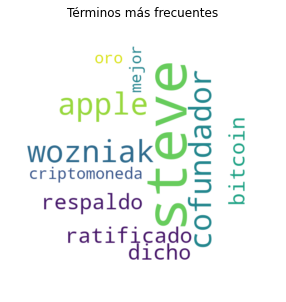

In [ ]:
nube_palabras(texto_limpio, dim_figura=(5,5), n_grama=1)

## Modelamiento con mas noticias. 

Ahora nos concentraremos en 8 noticias para hacer la vectorización y el modelamiento de las mismas. 

Vectorización 

In [ ]:
primeras_noticias = df[:7]['texto']
primeras_noticias

0    Los gemelos Bogdanov, populares por un meme de...
1    En un mundo tan cambiante, ahora es posible qu...
2    Paraguay podría estar iniciando su camino a la...
3    Las Ballenas Bitcoin movilizaron 22.174 BTC la...
4    En esta edición del resumen semanal, se presen...
5    El precio del Bitcoin continúa lateralizado, e...
6    La casa de subasta Sotheby’s vende un diamante...
Name: texto, dtype: object

Primero limpiaremos las noticias para evitar asi ruido y asi poder tener la mayor cantidad de información. 

In [ ]:
noticias_1 =list(primeras_noticias)
noticias_1

['Los gemelos Bogdanov, populares por un meme de manipulación de precio, aseguran que ayudaron a Satoshi Nakamoto a crear Bitcoin. ',
 'En un mundo tan cambiante, ahora es posible que gracias a la tecnología Blockchain mujeres puedan lograr su libertad financiera.',
 'Paraguay podría estar iniciando su camino a la adopción definitiva de criptomonedas en los próximos días. Entérate en el tweet del día.',
 'Las Ballenas Bitcoin movilizaron 22.174 BTC la semana pasada, pero, ¿esto quiere decir de alguna forma que hay tendencia bajista este mes? Veamos.',
 'En esta edición del resumen semanal, se presentan las noticias relacionadas con la minería de Bitcoin más destacadas y cargadas de polémica.',
 'El precio del Bitcoin continúa lateralizado, envuelto en un comportamiento muy poco volátil. Acá un análisis de la situación actual. ',
 'La casa de subasta Sotheby’s vende un diamante de más de 100 quilates por $ 12,3 millones en criptomonedas ¡Te contamos los detalles!']

In [ ]:
noticias_1_limpios= [limpieza_texto(texto, lista_palabras=lista_stopwords()) for texto in noticias_1]

In [ ]:
noticias_1_limpios

['gemelos bogdanov populares meme manipulación precio aseguran ayudaron satoshi nakamoto crear bitcoin',
 'mundo cambiante ahora posible gracias tecnología blockchain mujeres puedan lograr libertad financiera',
 'paraguay podría iniciando camino adopción definitiva criptomonedas próximos días entérate tweet día',
 'ballenas bitcoin movilizaron btc semana pasada quiere decir forma tendencia bajista mes veamos',
 'edición resumen semanal presentan noticias relacionadas minería bitcoin destacadas cargadas polémica',
 'precio bitcoin continúa lateralizado envuelto comportamiento volátil acá análisis situación actual',
 'casa subasta sotheby s vende diamante quilates millones criptomonedas contamos detalles']

Ahora vectorizaremos con contexto.



In [ ]:
from contexto.vectorizacion import VectorizadorFrecuencias

In [ ]:
vec_bow= VectorizadorFrecuencias()
vec_tfidf = VectorizadorFrecuencias(tipo='tfidf', idf=True)
vec_bow.ajustar(noticias_1_limpios)
vec_tfidf.ajustar(noticias_1_limpios)

In [ ]:
vb = vec_bow.vectorizar(noticias_1_limpios)
vtfidf = vec_tfidf.vectorizar(noticias_1_limpios)

En este caso lo que observaremos sera la cantidad de veces que una palabra se repite en el breve resumen de las noticias. 

In [ ]:
vb

array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [ ]:
vtfidf

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3005766 , 0.3005766 , 0.        , 0.        , 0.18516102,
        0.        , 0.3005766 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3005766 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3005766 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.3005766 , 0.3005766 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.3005766 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3005766 ,
        0.        , 0.2495044 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3005766 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

## Modelar

Para modelar nos apoyaremos de la libreria de gensim la cual nos permite de igual forma tokenizar los datos y a su vez limpiarlos y esto nos sirve para encontar temas en los textos que tenemos.

In [ ]:
import gensim

In [ ]:
noticias_1_limpios_token = [word_tokenize(texto) for texto in noticias_1_limpios]
corpus = gensim.corpora.Dictionary(noticias_1_limpios_token)

In [ ]:
noticias_1_limpios_token

[['gemelos',
  'bogdanov',
  'populares',
  'meme',
  'manipulación',
  'precio',
  'aseguran',
  'ayudaron',
  'satoshi',
  'nakamoto',
  'crear',
  'bitcoin'],
 ['mundo',
  'cambiante',
  'ahora',
  'posible',
  'gracias',
  'tecnología',
  'blockchain',
  'mujeres',
  'puedan',
  'lograr',
  'libertad',
  'financiera'],
 ['paraguay',
  'podría',
  'iniciando',
  'camino',
  'adopción',
  'definitiva',
  'criptomonedas',
  'próximos',
  'días',
  'entérate',
  'tweet',
  'día'],
 ['ballenas',
  'bitcoin',
  'movilizaron',
  'btc',
  'semana',
  'pasada',
  'quiere',
  'decir',
  'forma',
  'tendencia',
  'bajista',
  'mes',
  'veamos'],
 ['edición',
  'resumen',
  'semanal',
  'presentan',
  'noticias',
  'relacionadas',
  'minería',
  'bitcoin',
  'destacadas',
  'cargadas',
  'polémica'],
 ['precio',
  'bitcoin',
  'continúa',
  'lateralizado',
  'envuelto',
  'comportamiento',
  'volátil',
  'acá',
  'análisis',
  'situación',
  'actual'],
 ['casa',
  'subasta',
  'sotheby',
  's'

In [ ]:
bow_corpus = [corpus.doc2bow(texto) for texto in noticias_1_limpios_token]

Hallaremos cuantos topicos o temas debemos utilizar en nuestro modelo para nustro hiperparametro "num_topics" todo esto utilizando la coherencia del texto, para eso utilizaremos CoherenceModel.

In [ ]:
from gensim.models import CoherenceModel

coherencia = {}

for i in range(2,20):
  lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=i, id2word=corpus)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_1_limpios_token, dictionary=corpus, coherence='c_v')
  coherencia[i] = coherence_model_lda.get_coherence()

In [ ]:
coherencia

{2: 0.20834380324064852,
 3: 0.26040761944637975,
 4: 0.2762763533722795,
 5: 0.299918934471627,
 6: 0.20270392055687872,
 7: 0.4431474006852459,
 8: 0.439312548499026,
 9: 0.41449156026434253,
 10: 0.46643990859642176,
 11: 0.45517359278666353,
 12: 0.4741192711492765,
 13: 0.48698457012155444,
 14: 0.48530366730163677,
 15: 0.48600983358963457,
 16: 0.32497322247861155,
 17: 0.279209352336224,
 18: 0.2826057904627746,
 19: 0.280126185388148}

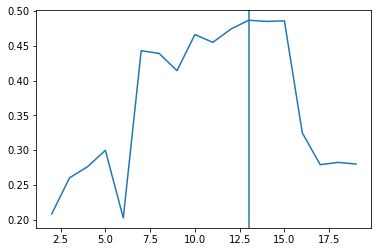

In [ ]:
import matplotlib.pyplot as plt
X = [i for i in coherencia.keys()]
y= [i for i in coherencia.values()]
plt.axvline(X[y.index(max(y))])
plt.plot(X,y)

En este caso nuestro modelo nos indica que en el nivel maximo de coherencia es cuando utilizamos 13 topicos. 

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=13, id2word=corpus)

In [ ]:
lda_model

In [ ]:
for idx, topic in lda_model.print_topics(): 
  print('Topic:{}\nWords:{}'.format(idx, topic))

Topic:0
Words:0.013*"bitcoin" + 0.013*"diamante" + 0.013*"situación" + 0.013*"cargadas" + 0.013*"criptomonedas" + 0.013*"subasta" + 0.013*"actual" + 0.013*"precio" + 0.013*"ahora" + 0.013*"minería"
Topic:1
Words:0.057*"bitcoin" + 0.057*"bajista" + 0.057*"pasada" + 0.057*"tendencia" + 0.057*"mes" + 0.057*"forma" + 0.057*"quiere" + 0.057*"btc" + 0.057*"movilizaron" + 0.057*"decir"
Topic:2
Words:0.013*"bitcoin" + 0.013*"criptomonedas" + 0.013*"precio" + 0.013*"semana" + 0.013*"meme" + 0.013*"resumen" + 0.013*"millones" + 0.013*"ballenas" + 0.013*"diamante" + 0.013*"blockchain"
Topic:3
Words:0.013*"bitcoin" + 0.013*"precio" + 0.013*"vende" + 0.013*"actual" + 0.013*"criptomonedas" + 0.013*"iniciando" + 0.013*"próximos" + 0.013*"presentan" + 0.013*"gemelos" + 0.013*"polémica"
Topic:4
Words:0.060*"precio" + 0.060*"manipulación" + 0.060*"crear" + 0.060*"satoshi" + 0.060*"bogdanov" + 0.060*"ayudaron" + 0.060*"aseguran" + 0.060*"gemelos" + 0.060*"nakamoto" + 0.060*"bitcoin"
Topic:5
Words:0.060*"

Para finalizar podemos ver que el mayor tema nace con Bitcoin y esto en gran parte se debe a que el portal de noticias abarca el tema de las criptomonedas y el Bitcoin es la principal, tenemos otros tenemos como precio, criptomonedas manipulacion entre otras palabras que estan relacionados en los textos. 